In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-11-30 / Aki Taanila


## Barplot - määrällisten muuttujien yhteenvetoja

Seabornin **barplot** esittää oletuksena keskiarvoja. Pylvään päässä näkyvä viiva kuvaa keskiarvon 95 % luottamusväliä. Lisätietoa https://seaborn.pydata.org/generated/seaborn.barplot.html.


### Tuonnit ja alkuvalmistelut

 Grafiikan tyylimäärittelyssä voit käyttää **'whitegrid'** sijasta **'white'**, **'dark'**, **'darkgrid'** tai **'ticks'**. Voit myös jättää tyylimäärittelyn tekemättä.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Datojen avaaminen

Seaborn-paketin esimerkkidata **penguins** sisältää tietoja pingviinilajeista eri saarilla.

In [3]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Seaborn-paketin esimerkkidata **tips** sisältää tietoja ravintolassa asioineista seurueista.

In [4]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Useiden muuttujien keskiarvot

Parametri `orient='y'` vaihtaa pystypylväskaavion vaakapylväskaavioksi.

([<matplotlib.axis.YTick at 0x1606f17d010>,
 [Text(0, 0, 'Nokan pituus, n=342'), Text(0, 1, 'Nokan leveys, n=342')])

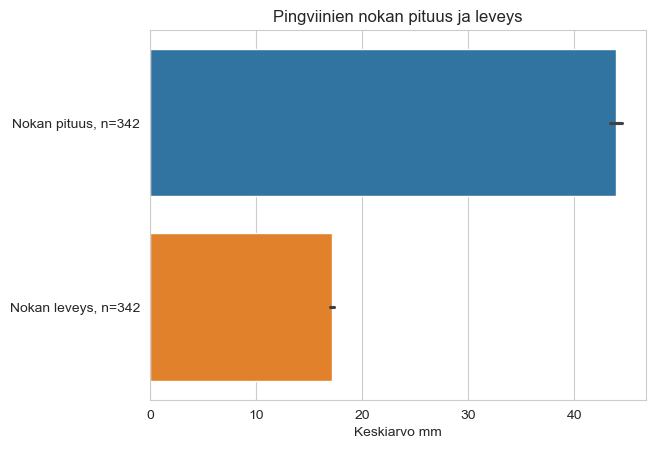

In [5]:
sns.barplot(penguins[['bill_length_mm', 'bill_depth_mm']], orient='y')
plt.title('Pingviinien nokan pituus ja leveys')
plt.xlabel('Keskiarvo mm')
plt.yticks([0, 1], [f'Nokan pituus, n={penguins['bill_length_mm'].count()}', 
                    f'Nokan leveys, n={penguins['bill_depth_mm'].count()}'])

### Keskiarvot kategorisen muuttujan määrittämissä ryhmissä

Ryhmittelevän muuttujan voit lisätä **x**- tai **y**-parametrina riippuen siitä kumman parametrin arvona on määrällinen muuuttuja. Esimerkissä käytetään vaakapylväitä, jolloin määrällinen muuttuja annetaan **x**-parametrina ja ryhmittelevä muuttuja **y**-parametrina.

([<matplotlib.axis.YTick at 0x1606f22a0d0>,
 [Text(0, 0, 'Adelie, n=151'),
  Text(0, 1, 'Chinstrap, n=68'),
  Text(0, 2, 'Gentoo, n=123')])

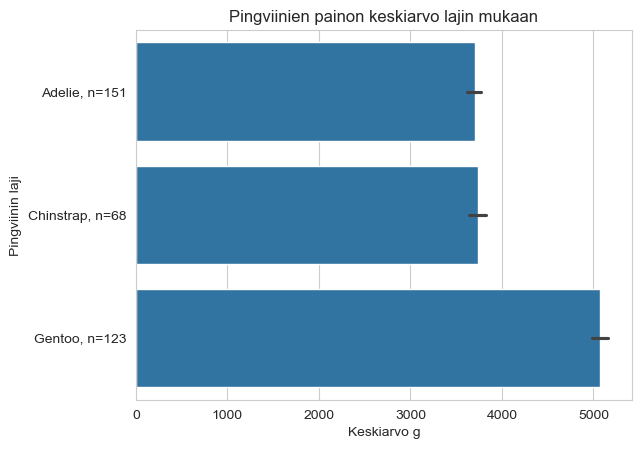

In [6]:
sns.barplot(penguins, x='body_mass_g', y='species')
plt.title('Pingviinien painon keskiarvo lajin mukaan')
plt.xlabel('Keskiarvo g')
plt.ylabel('Pingviinin laji')

n_arvot = penguins.groupby('species')['body_mass_g'].count()
plt.yticks([0, 1, 2], [f'Adelie, n={n_arvot['Adelie']}', 
                       f'Chinstrap, n={n_arvot['Chinstrap']}', 
                       f'Gentoo, n={n_arvot['Gentoo']}'])

Keskiarvon sijasta voit käyttää myös muita tunnuslukuja. Seuraavassa esimerkissä on laskettu laskujen summa (`estimator='sum').

Pylväiden nimet (**xticks**) korvataan suomenkielisillä viikonpäivillä. Ennen korvaamista on tärkeää katsoa kaaviosta, mitä viikonpäivää mikäkin pylväs edustaa. **plt.xticks**-funktion ensimmäinen parametri on viittaus korvattavien nimien numeroihin [0, 1, 2, 3]. Toisena parametrina annetaan korvattavat arvot.

([<matplotlib.axis.XTick at 0x1606f281e50>,
 [Text(0, 0, 'Torstai'),
  Text(1, 0, 'Perjantai'),
  Text(2, 0, 'Lauantai'),
  Text(3, 0, 'Sunnuntai')])

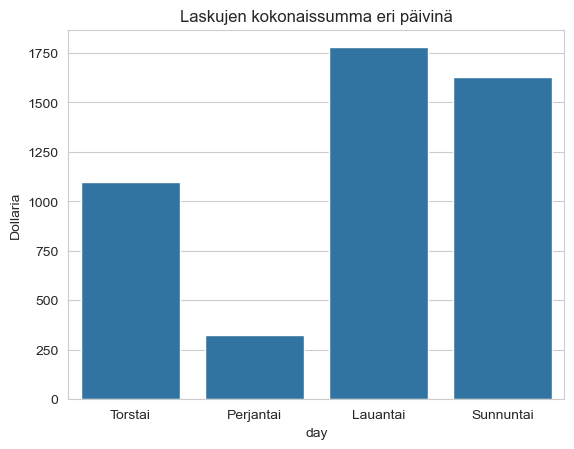

In [7]:
sns.barplot(tips, x='day', y='total_bill', estimator='sum', errorbar=None)
plt.title('Laskujen kokonaissumma eri päivinä')
plt.ylabel('Dollaria')
plt.xticks([0, 1, 2, 3], ['Torstai', 'Perjantai', 'Lauantai', 'Sunnuntai'])

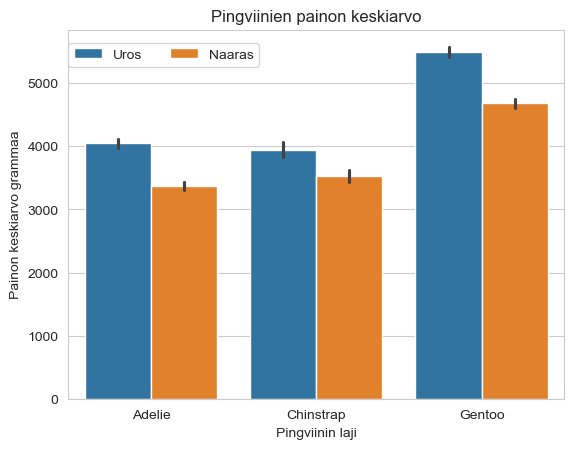

In [8]:
ax = sns.barplot(penguins, x='species', y='body_mass_g', hue='sex')
plt.title('Pingviinien painon keskiarvo')
plt.xlabel('Pingviinin laji')
plt.ylabel('Painon keskiarvo grammaa')
handles, labels  =  ax.get_legend_handles_labels()
plt.legend(handles, ['Uros', 'Naaras'], loc=(0, 0.9), ncol=2)

Havaintojen lukumäärät eri ryhmissä (**n-arvot**) olisi aina syytä tarkistaa. Edellisen kaavion kuuden ryhmän n-arvoja on vaikea sijoittaa kaavioon, mutta ne ovat helposti laskettavissa komennolla `penguins.groupby(['sex', 'species'])['body_mass_g'].count()`. Samassa yhteydessä voidaan laskea myös muut tunnusluvut **describe**-funktiolla kuten seuraavassa on tehty.

In [9]:
penguins.groupby(['sex', 'species'])['body_mass_g'].describe()

count         mean         std     min      25%     50%  \
sex    species                                                              
Female Adelie      73.0  3368.835616  269.380102  2850.0  3175.00  3400.0   
       Chinstrap   34.0  3527.205882  285.333912  2700.0  3362.50  3550.0   
       Gentoo      58.0  4679.741379  281.578294  3950.0  4462.50  4700.0   
Male   Adelie      73.0  4043.493151  346.811553  3325.0  3800.00  4000.0   
       Chinstrap   34.0  3938.970588  362.137550  3250.0  3731.25  3950.0   
       Gentoo      61.0  5484.836066  313.158596  4750.0  5300.00  5500.0   

                      75%     max  
sex    species                     
Female Adelie     3550.00  3900.0  
       Chinstrap  3693.75  4150.0  
       Gentoo     4875.00  5200.0  
Male   Adelie     4300.00  4775.0  
       Chinstrap  4100.00  4800.0  
       Gentoo     5700.00  6300.0

## Catplot

Seabornin **catplot**-funktio on oikotie usean kaavion yhdistelmiin kategoristen muuttujien määrittämissä ryhmissä. Lisätietoa https://seaborn.pydata.org/generated/seaborn.catplot.html.

Seuraavassa edellinen kaavio on toteutettu **catplot**-funktiolla. Kaaviolaji määritetään parametrina `kind='bar`.

**catplot** palauttaa **Facetgrid**-luokan olion, jolla on omat funktionsa otsikointien ym. ominaisuuksien muotoiluun. Esimerkissä olio sijoitetaan **g**-nimiseen muuttujaan. Lisätietoa https://seaborn.pydata.org/generated/seaborn.FacetGrid.html.

Yksittäisiin kaavioihin voidaan viitata rivi-ja sarakenumeroiden avulla, esimerkiksi `g.axes[0, 0]`. Rivinumero on pakollinen vaikka kuvia olisi vain yhdellä rivillä kuten tässä esimerkissä.

Text(0.5, 1.0, 'Naaras')

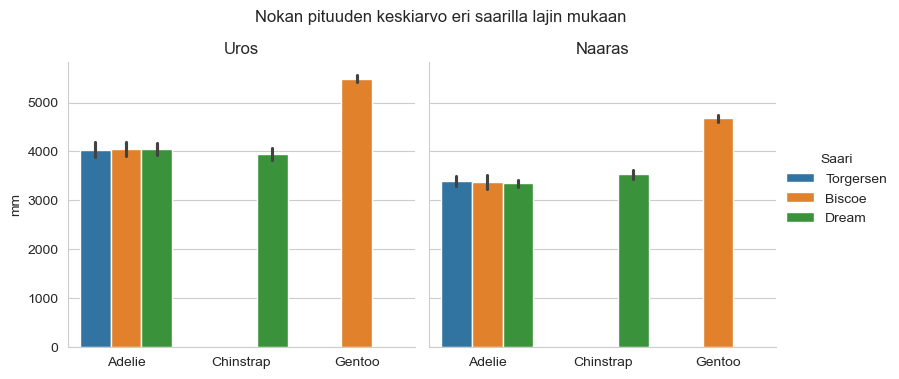

In [10]:
g = sns.catplot(penguins, x='species', y='body_mass_g', col='sex', hue='island', kind='bar', height=4)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Nokan pituuden keskiarvo eri saarilla lajin mukaan")
g.set_axis_labels('', 'mm')
g.legend.set_title('Saari')
g.axes[0, 0].set_title('Uros')
g.axes[0, 1].set_title('Naaras')

Seuraavassa vielä n-arvot ja samalla muut tunnusluvut taulukkona.

In [11]:
penguins.groupby(['sex', 'island', 'species'])['flipper_length_mm'].describe()

count        mean       std    min     25%    50%  \
sex    island    species                                                        
Female Biscoe    Adelie      22.0  187.181818  6.744567  172.0  184.25  187.0   
                 Gentoo      58.0  212.706897  3.897856  203.0  210.00  212.0   
       Dream     Adelie      27.0  187.851852  5.510156  178.0  185.00  188.0   
                 Chinstrap   34.0  191.735294  5.754096  178.0  187.25  192.0   
       Torgersen Adelie      24.0  188.291667  4.638958  176.0  186.00  189.0   
Male   Biscoe    Adelie      22.0  190.409091  6.463517  180.0  185.75  191.0   
                 Gentoo      61.0  221.540984  5.673252  208.0  218.00  221.0   
       Dream     Adelie      28.0  191.928571  6.803749  178.0  188.50  190.5   
                 Chinstrap   34.0  199.911765  5.976558  187.0  196.00  200.5   
       Torgersen Adelie      23.0  194.913043  5.915412  181.0  192.00  195.0   

                               75%    max  
sex    island    species                   
Female Biscoe    Adelie     191.75  199.0  
                 Gentoo     215.00  222.0  
       Dream     Adelie     191.00  202.0  
                 Chinstrap  195.75  202.0  
       Torgersen Adelie     191.00  196.0  
Male   Biscoe    Adelie     194.75  203.0  
                 Gentoo     225.00  231.0  
       Dream     Adelie     196.00  208.0  
                 Chinstrap  203.00  212.0  
       Torgersen Adelie     198.00  210.0

### Muuta huomioitavaa

### Keskiarvon sijasta muita tunnuslukuja

**barplot**in **estimator**-paramterilla voit vaihtaa laskettavaksi keskiarvon sijasta jonkin muun tunnusluvun, esimerkiksi `estimator='sum'`.

#### Fontit

Tekstiä lisäävät funktiot (**plt.title**, **plt.xlabel**, **plt.xticks** jne.) tunnistavat tekstiin liittyviä parametreja https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text kuten esimerkiksi **fontsize** ja **fontstyle**.

Jos haluat tehdä kerralla koko muistiota koskevia fonttimuutoksia, niin katso [matplotlib7.ipynb](https://github.com/taanila/kaaviot/blob/master/matplotlib7.ipynb).

#### Värit

Kaavion väripaletin voit vaihtaa antamalla kaavionluonti-komennossa arvo **palette**-parametrille. Esimerkiksi `palette='Set1'` muuttaa paletiksi **Set1** tai `palette=['green', 'red']` muuntaa kahdenvärisiä pylväitä sisältävän kaavion pylväät vihreiksi ja punaisiksi.

Jos haluat käyttää kaikissa muistion kaavioissa samaa vaihtoehtoista palettia, niin käytä **sns.set_palette**-funktiota, esimerkiksi `sns.set_palette('Set1')`.

- Värejä https://matplotlib.org/stable/gallery/color/named_colors.html.
- Paletteja https://matplotlib.org/stable/gallery/color/colormap_reference.html.

#### Kuvion koko

Kuvion (**Figure**) oletuskoko on 6.4 x 4.8. Jos haluat vaihtaa koon, niin luo kuvio ennen kaavion luontia, esimerkiksi `plt.figure(figsize=(4, 3))`. Funktiolla **catplot** luotavan kaavion kokoa voit säätää **height**-parametrilla.

### Lisätietoa

https://tilastoapu.wordpress.com/python